# Project 01 - Color Compression

## Thông tin sinh viên

- Họ và tên:
- MSSV:
- Lớp:

## Import các thư viện liên quan

In [79]:
import matplotlib.pyplot as plt
import PIL
import numpy as np
import math

## Helper functions

In [85]:
import PIL.Image


def read_img(img_path):
    '''
    Read image from img_path

    Parameters
    ----------
    img_path : str
        Path of image

    Returns
    -------
        Image (2D)
    '''

    # YOUR CODE HERE
    return PIL.Image.open(img_path)

def show_img(img_2d):
    '''
    Show image

    Parameters
    ----------
    img_2d : <your type>
        Image (2D)
    '''

    # YOUR CODE HERE
    plt.imshow(img_2d)

def save_img(img_2d, img_path):
    '''
    Save image to img_path

    Parameters
    ----------
    img_2d : <your type>
        Image (2D)
    img_path : str
        Path of image
    '''
    
    # YOUR CODE HERE
    img_2d.save(img_path, 'PNG')

def convert_img_to_1d(img_2d):
    '''
    Convert 2D image to 1D image

    Parameters
    ----------
    img_2d : <your type>
        Image (2D)

    Returns
    -------
        Image (1D)
    '''
    
    # YOUR CODE HERE
    A = np.asarray(img_2d)
    X = A.reshape(A.shape[0] * A.shape[1], A.shape[2])
    return X

def kmeans(img_1d, k_clusters, max_iter, init_centroids='random'):
    '''
    K-Means algorithm

    Parameters
    ----------
    img_1d : np.ndarray with shape=(height * width, num_channels)
        Original (1D) image
    k_clusters : int
        Number of clusters
    max_iter : int
        Max iterator
    init_centroids : str, default='random'
        The method used to initialize the centroids for K-means clustering
        'random' --> Centroids are initialized with random values between 0 and 255 for each channel
        'in_pixels' --> A random pixel from the original image is selected as a centroid for each cluster

    Returns
    -------
    centroids : np.ndarray with shape=(k_clusters, num_channels)
        Stores the color centroids for each cluster
    labels : np.ndarray with shape=(height * width, )
        Stores the cluster label for each pixel in the image
    '''
    
    # YOUR CODE HERE


def generate_2d_img(img_2d_shape, centroids, labels):
    '''
    Generate a 2D image based on K-means cluster centroids

    Parameters
    ----------
    img_2d_shape : tuple (height, width, 3)
        Shape of image
    centroids : np.ndarray with shape=(k_clusters, num_channels)
        Store color centroids
    labels : np.ndarray with shape=(height * width, )
        Store label for pixels (cluster's index on which the pixel belongs)

    Returns
    -------
        New image (2D)
    '''

    # YOUR CODE HERE


# Your additional functions here


## Your tests

In [81]:
# YOUR CODE HERE

## Main FUNCTION

In [82]:
# YOUR CODE HERE

In [83]:
# Call main function

# TESTING ZONE


Compressing...
Init centroids
Loop:  0
Loop:  1
Loop:  2
Loop:  3
Loop:  4
Loop:  5
Loop:  6
Loop:  7
Loop:  8
Loop:  9
Loop:  10
Loop:  11
Loop:  12
Loop:  13
Loop:  14
Loop:  15
Loop:  16
Loop:  17
Loop:  18
Loop:  19
Loop:  20
Loop:  21
Loop:  22
Loop:  23
Loop:  24
Loop:  25
Loop:  26
Loop:  27
Loop:  28
Loop:  29
Loop:  30
Loop:  31
Loop:  32
Loop:  33
Loop:  34
Loop:  35
Loop:  36
Loop:  37
Loop:  38
Loop:  39
Loop:  40
Loop:  41
Loop:  42
Loop:  43
Loop:  44
Loop:  45
Loop:  46
Loop:  47
Loop:  48
Loop:  49
Loop:  50
Generating...
Result:


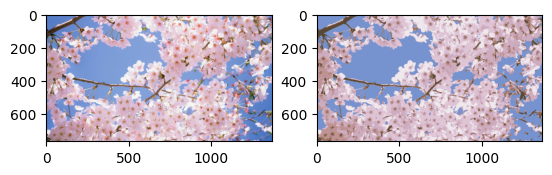

In [89]:
# https://www.youtube.com/watch?v=5w5iUbTlpMQ
# https://www.youtube.com/watch?v=8mUi6U_5ZCg

def kmeans(img_1d, k_clusters, max_iter, init_centroids='random'):
    '''
    K-Means algorithm

    Parameters
    ----------
    img_1d : np.ndarray with shape=(height * width, num_channels)
        Original (1D) image
    k_clusters : int
        Number of clusters
    max_iter : int
        Max iterator
    init_centroids : str, default='random'
        The method used to initialize the centroids for K-means clustering
        'random' --> Centroids are initialized with random values between 0 and 255 for each channel
        'in_pixels' --> A random pixel from the original image is selected as a centroid for each cluster

    Returns
    -------
    centroids : np.ndarray with shape=(k_clusters, num_channels)
        Stores the color centroids for each cluster
    labels : np.ndarray with shape=(height * width, )
        Stores the cluster label for each pixel in the image
    '''
    
    # YOUR CODE HERE

def findDistance(pixel, centroids):
    # use euclidean distance to find the distance of 1 pixel to all the centroids
    # return a list of distances
    return np.sqrt(np.sum((centroids - pixel)**2, axis=1))

class KMeansClustering:
    def __init__(self, k = 3):
        self.k = k
        self.centroids = None

    def fit(self, img_1d, max_iter = 100): # X: 1D Image
        # init centroids
        print("Init centroids")
        self.centroids = np.random.uniform(np.min(img_1d, axis=0), np.max(img_1d, axis=0), size=(self.k, img_1d.shape[1]))

        # pixel/cluster are the same, just data point
        for time in range(max_iter):
            # idex of y is pixel
            # value of y[idx] is marked centroid
            print("Loop: ", time)
            distances = np.sqrt(np.sum((self.centroids[:, np.newaxis] - img_1d)**2, axis=2))
            y = np.argmin(distances, axis=0)
            # y = []

            # print("Mark pixel with centroids")
            # # Find min distance
            # for pixel in img_1d:
            #     # find all the distance between the pixel and all the centroids
            #     distances = findDistance(pixel, self.centroids)
            #     # find the nearest centroids to that pixel and mark that centroid
            #     # e.g: 3 centroids (c0 ,c1, c3) => distance == [dc0, dc1, dc2] and the nearest one is c0
            #     cluster_num = np.argmin(distances)
            #     # add the marked centroids to the labels => the corresponded pixel goes with the nearest centroids
            #     y.append(cluster_num)

            # y = np.array(y)
            # print("Done: mark pixel with centroids")


            # list of which cluster marked with which centroids
            # c0: clster1, clster 2, ...
            # ck: ...
            cluster_indices = []

            for i in range(self.k):
                cluster_indices.append(np.argwhere(y == i))

            # reposition centroids
            cluster_center = []

            # print("Reposition centroids")
            for i, indices in enumerate(cluster_indices):
                # a centroid with no one marked
                if len(indices) == 0:
                    cluster_center.append(self.centroids[i])
                else:
                    cluster_center.append(np.mean(img_1d[indices], axis=0)[0])
                    # print(cluster_center)

            if np.max(self.centroids - np.array(cluster_center)) < 0.0001: # no changes
                break
            else:
                self.centroids = np.array(cluster_center)
            # print("Done: reposition centroids")

        return  self.centroids, y # cluster labels


# testImgPath =  'C:\\Users\\Admin\\Documents\\HCMUS\\Year 2\\Applied_Math\\Picture\\new-wallpaper-suggestion-garuda-community-garuda-linux-forum.jpeg'
# testPath = '/content/new-wallpaper-suggestion-garuda-community-garuda-linux-forum.jpeg'
# testPath = '/content/2456269.jpg'
## testPath = '/content/undefined - Imgur.png'
# testPath = '/content/wallpapersden.com_windows-10-abstract-purple-shape_1920x1080.jpg'
# testPath = '/content/wallpapersden.com_flowers-bloom-bright_1366x768.jpg'
## testPath = '/content/wallpapersden.com_tree-landscape_5426x3052.jpg'
# testPath = '/content/wallpapersden.com_windows-10-abstract-purple-shape_1920x1080.jpg'
# testPath = '/content/wallpapersden.com_mountain-sunset-hd-2021_2048x1365.jpg'
# testPath = 'C:\\Users\\Admin\\Documents\HCMUS\\Year 2\\Applied_Math\\Picture\\wallpapersden.com_mountain-sunset-hd-2021_2048x1365.jpg'
testPath = 'C:\\Users\\Admin\\Documents\\HCMUS\\Year 2\\Applied_Math\\Picture\\wallpapersden.com_flowers-bloom-bright_1366x768.jpg'
testImg = read_img(testPath)
img_2d = np.asarray(testImg)
# plt.imshow(img_2d)
img_1d = convert_img_to_1d(testImg)
print("Compressing...")
kmeans = KMeansClustering(k = 7)
centroids, labels = kmeans.fit(img_1d)

compressed_img_1d = img_1d.copy()

print("Generating...")
for i, label in enumerate(labels):
    compressed_img_1d[i] = centroids[labels[i]]

fig, ax = plt.subplots(1, 2)

print("Result:")
compressed_img_2d = compressed_img_1d.reshape(img_2d.shape[0], img_2d.shape[1], img_2d.shape[2])
oriImg = ax[0].imshow(img_2d)
compressedImg = ax[1].imshow(compressed_img_2d)
plt.show()

pilImg = PIL.Image.fromarray(compressed_img_2d)
pilImg.show()

# plt.imshow(compressed_img_2d)


In [ ]:
def findDistance(pixel, centroids):
    # use euclidean distance to find the distance of 1 pixel to all the centroids
    # return a list of distances
    return np.sqrt(np.sum((centroids - pixel)**2, axis=1))


# testImgPath =  'C:\\Users\\Admin\\Documents\\HCMUS\\Year 2\\Applied_Math\\Picture\\undefined - Imgur.png'
# testImgPath =  'C:\\Users\\Admin\\Documents\\HCMUS\\Year 2\\Applied_Math\\Picture\\2456269.jpg'
testImgPath =  'C:\\Users\\Admin\\Documents\\HCMUS\\Year 2\\Applied_Math\\Picture\\new-wallpaper-suggestion-garuda-community-garuda-linux-forum.jpeg'
testImg = read_img(testImgPath)
convert_img_to_1d(testImg)
oriArray = np.asarray(testImg)
newArray = oriArray.reshape(oriArray.shape[0]*oriArray.shape[1], oriArray.shape[2])


k = 4

centroids = np.random.uniform(np.min(newArray, axis=0), np.max(newArray, axis=0), size=(k, newArray.shape[1]))
# centroids_2 = np.random.uniform(np.min(newArray), np.max(newArray), size=(k, newArray.shape[1]))
print(newArray.shape)

print(centroids)

# tmpArray = newArray[]

testPixel = np.max(newArray, axis=0)
distances = findDistance(testPixel, centroids)
print(distances)
cluster_num = np.argmin(distances)
print(cluster_num)
indices = [4, 11333, 1333233, 22119]
print(indices)
print(newArray[indices])
print(np.mean(newArray[indices], axis=0))
print(np.mean(newArray[indices], axis=0)[1])

# show_img(testImg)
# A = np.asarray(testImg)
# newImg = PIL.Image.fromarray(A*3)

# newPath = 'C:\\Users\\Admin\\Documents\\HCMUS\\Year 2\\Applied_Math\\Picture\\whatisthis.png'
# save_img(newImg, newPath)

(3686400, 3)
[[213.95455173  63.8717371  206.55567676]
 [134.05444361 124.94558166 163.29272059]
 [113.61494904 140.05143978 122.83875684]
 [  5.56345699 229.5910815   21.4759116 ]]
[195.39232992 179.52467154 202.46656664 315.6624365 ]
1
[4, 11333, 1333233, 22119]
[[ 14  27  33]
 [ 43 105 102]
 [ 29  80  65]
 [ 48 121 102]]
[33.5  83.25 75.5 ]
83.25
